# 模块7-机器学习基础-基础篇-11-从决策树到随机森林-决策树篇(3)-回归树

## 决策树回归-从一维决策树开始

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [4]:
from sklearn.tree import DecisionTreeRegressor # 回归树

In [41]:
N = 100
x = np.random.rand(N) * 6 - 3
y = np.sin(x) + np.random.rand(N) * 0.5
x = x.reshape(-1,1)

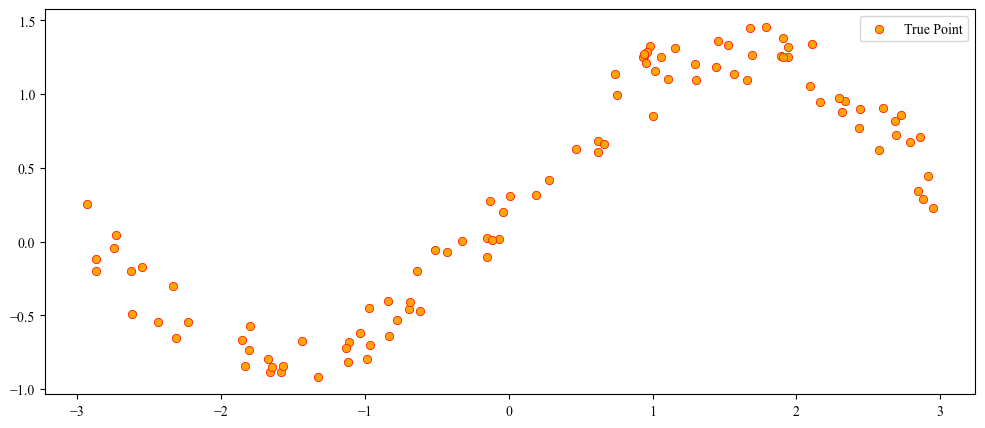

In [42]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(12, 5),dpi=100)
plt.scatter(x, y, c='orange', edgecolors='red', linewidths=0.5,label='True Point')
plt.legend()
plt.show()

In [45]:
dt_reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

dt_reg.fit(x, y)

x_test = np.linspace(-3,3,100).reshape(-1,1)
y_pred = dt_reg.predict(x_test)

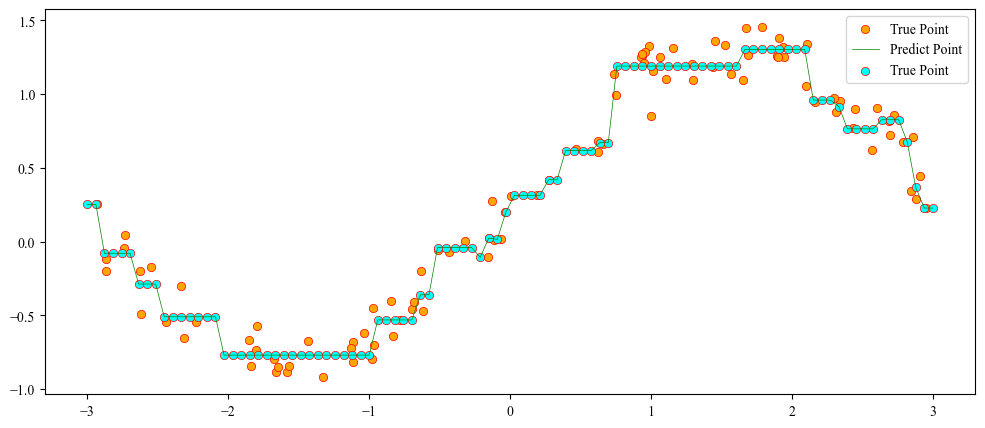

In [51]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(12, 5),dpi=100)
plt.scatter(x, y, c='orange', edgecolors='red', linewidths=0.5,label='True Point')
plt.plot(x_test, y_pred, 'g-', linewidth=.5,label='Predict Point')
plt.scatter(x_test, y_pred, c='cyan', edgecolors='red', linewidths=0.5,label='True Point')
plt.legend()
plt.show()

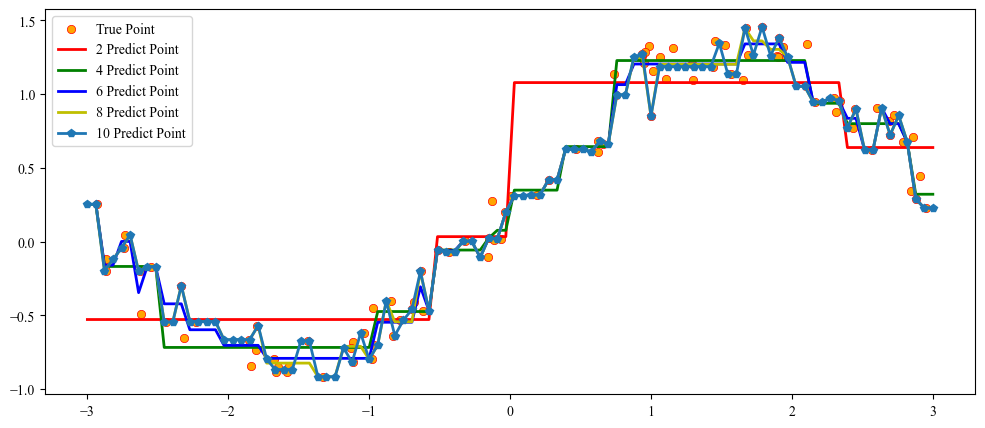

In [60]:
depth = range(2,11,2)
color = 'rgbyp'
x_test = np.linspace(-3,3,100).reshape(-1,1)
dt_reg = DecisionTreeRegressor()
plt.figure(figsize=(12, 5),dpi=100)

for d,c in zip(depth, color):
    dt_reg.set_params(max_depth=d)
    dt_reg.fit(x, y)
    y_pred = dt_reg.predict(x_test)
    plt.plot(x_test, y_pred, f'{c}-', linewidth=2,label=f'{d} Predict Point')
plt.legend()
plt.show()

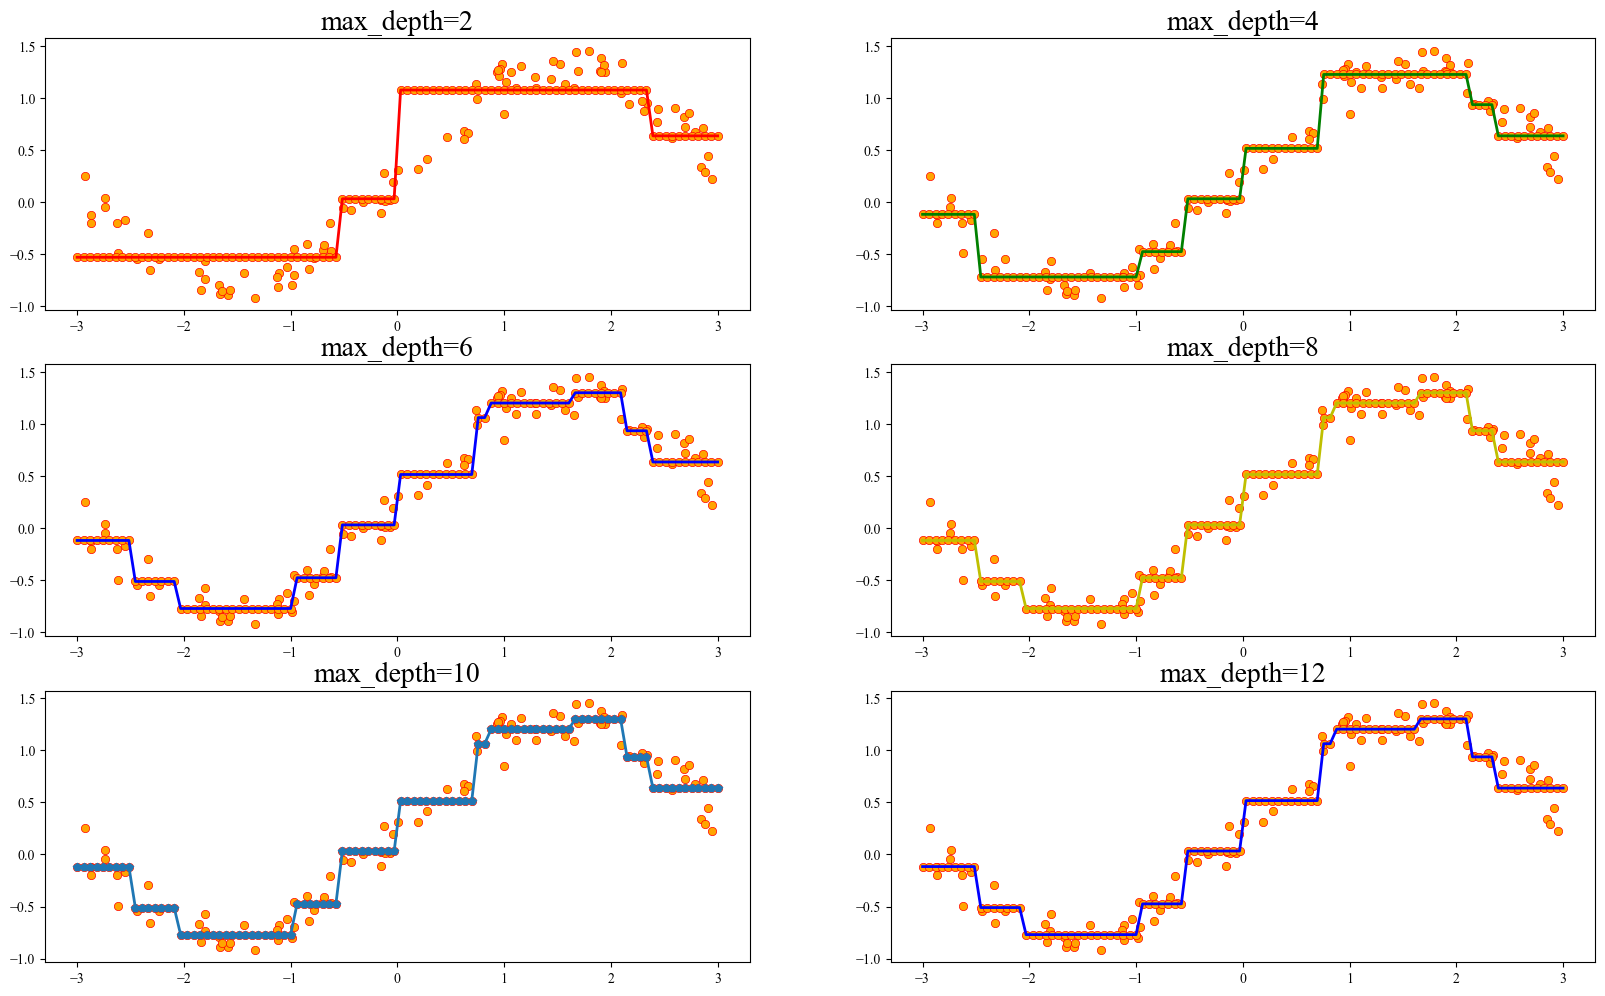

In [77]:
dt_reg = DecisionTreeRegressor(min_samples_split=20)
plt.figure(figsize=(20,12),dpi=100)
color = 'rrgbypb'
for i in range(1,7):
    plt.subplot(3,2, i)
    plt.scatter(x, y, c='orange', edgecolors='red', linewidths=0.5,label='True Point')
    dt_reg.set_params(max_depth=i*2)
    dt_reg.fit(x, y)
    y_pred = dt_reg.predict(x_test)
    plt.plot(x_test, y_pred, f'{color[i]}-', linewidth=2,label=f'{d} Predict Point')
    plt.scatter(x_test, y_pred, c='orange', edgecolors='red', linewidths=0.5,
                label='predict Point')
    plt.title(f"max_depth={i*2}",fontsize=20)

## 回归树案例'
要求更具有其他字段来预测预测年龄

Pclass, Fare, Sex, Cabin, Embarked,  Survivied 根据这些字段,来预测成员的年龄

In [79]:
dataset = pd.read_csv('./data/titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 年龄的处理
2. 编码问题, 性别两种,分别编码为整数(0,1)
3. Cabin字段, 编码为类别数减1,
4. Embarked字段,编码为类别数减1, SCQ->0,1,2

In [83]:
dataset['Age'].isna().sum()

177

In [91]:
dataset['Cabin_label'] = dataset['Cabin'].astype('category').cat.codes
dataset['Embarked_label'] = dataset['Embarked'].astype('category').cat.codes
dataset['Sex_label'] = dataset['Sex'].astype('category').cat.codes

In [94]:
dataset['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

In [96]:
data = dataset[['Pclass','Fare', 'Sex_label', 'Cabin_label','Embarked_label','Survived', 'Age']]

In [105]:
val_data = data[data['Age'].isna()]
X_val = val_data.iloc[:,:-1] # 最终要预测的数据

data_ = data[data['Age'].notna()]
X = data_.iloc[:,:-1]
y = data_.iloc[:,-1]

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1210)

{'absolute_error', 'poisson', 'friedman_mse', 'squared_error'}

In [171]:
tree_reg = DecisionTreeRegressor(
    max_depth=3,
    random_state=1210,
    criterion='friedman_mse'
    )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=1210)

- 参数: criterion
在机器学习中，回归树是一种决策树的类型，用于回归问题，即预测连续值。回归树通过将特征空间划分成一系列的区域，并在每个区域中拟合一个简单的模型（通常是常数值）来预测输出。以下是你提到的几个参数和它们在回归树中的解释：

1. **absolute_error**：绝对误差
   - 绝对误差是指预测值与实际值之间的差异的绝对值。在回归树中，这通常用来衡量模型的预测误差。平均绝对误差（Mean Absolute Error, MAE）是所有预测误差的平均值，是回归树常用的性能评估指标之一。

2. **poisson**：泊松误差
   - 泊松误差是一种用于评估模型性能的指标，特别适用于目标变量遵循泊松分布的情况。它计算的是模型预测值与实际值之间的泊松对数似然差异。在回归树中，如果预测的任务与计数数据相关，可能会使用这种误差度量。

3. **friedman_mse**：费尔德曼均方误差
   - 费尔德曼均方误差（Friedman Mean Squared Error, FMSE）是一种改进的均方误差（Mean Squared Error, MSE）的变体。它通过对均方误差进行调整来减少异常值的影响。FMSE的计算公式是：$$ FMSE = \frac{1}{n} \sum_{i=1}^{n} \frac{(y_i - \hat{y}_i)^2}{y_i + \hat{y}_i + 1} $$ 其中 $ y_i $ 是实际值$ \hat{y}_i $ 是预测值。这种误差度量在处理具有异常值的数据时特别有用。

4. **squared_error**：平方误差
   - 平方误差是最常用的回归评估指标之一，它计算的是预测值与实际值之间差异的平方。均方误差（Mean Squared Error, MSE）是所有预测误差平方的平均值，它对较大的误差给予更大的权重，因为误差是平方的。在回归树中，最小化MSE是构建模型的一个重要目标。

在实际应用中，选择哪种误差度量取决于数据的特性和问题的具体需求。例如，如果数据中包含许多异常值，可能会选择FMSE来减少这些异常值对模型性能评估的影响。如果数据是计数数据，可能会选择泊松误差。而MAE和MSE则是最常用的误差度量，它们在不同的场景下都有广泛的应用。
`

- min_samples_split: 分裂内部节点所需要最小样本数量
- min_samples_leaf: 叶子节点的最小样本数
- max_features: 寻找最佳分分列时要考虑的特征数量: {'aoto', 'squt', 'log2'}
- max_leaf_nodes: 叶子节点的最大数量
- presort: 在寻找最佳分裂之前,先对数据进行排序..默认是关闭
- splotter: 选择分裂节点的方式, {best, random},best会寻找最佳的分裂,random寻找一个足够好的分裂.
- min_impurity_decrease: 如果节点的分裂导致不纯度减少大于或者等于这个值,则节点分裂.
- min_weight_fractioin_leaf: 叶子节点的最小权重分数,

### 评分指标

In [258]:
# 使用交叉验证计算得分
from sklearn.model_selection import cross_val_score

cross_val_score(tree_reg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')

array([-22.93441224, -20.00630789, -18.8870904 , -34.77008631,
       -18.24164097, -12.73161203, -15.6161881 , -25.16369827,
       -41.00391642, -10.39857971])

In [172]:
y_pred = tree_reg.predict(X_test) # 预测目标变量
# y_pred

In [179]:
# 使用均方误差查看, 预测值和真实值之间差异的平方的均值
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(f"MSE计算分数为: {mse}")

# 对数均方误差,适用于目标值总是正数的情况
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_true=y_test,y_pred=y_pred)
print(f"MSLE计算分数为: {msle}")

# 设定squared可以计算mse开根号
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False) 
print(f"均方误差的平方根计算分数为: {rmse}")


# 均方误差的平方根,提供了与原始数据相同单位的误差,
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred,)
print(f"均方误差的平方根计算分数为: {rmse}")

# 平均绝对误差,衡量预测值和实际值之间差异绝对值的平均值
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(f"平均绝对误差的计算分数: {mae}")


# R^2, 衡量模型预测的方差与总方差的比例,越接近1模型衡量的越准确
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f'计算得出的R^2为: {r2}')

MSE计算分数为: 180.4723269141574
MSLE计算分数为: 0.5836383210438983
均方误差的平方根计算分数为: 13.43399891745408
均方误差的平方根计算分数为: 13.43399891745408
平均绝对误差的计算分数: 10.543600920337196
计算得出的R^2为: 0.17770743601924877


D:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


### 一些重要的属性接口

In [190]:
tree_reg.n_features_in_ # 一共有多少个特征
tree_reg.feature_importances_ # 每一个特征的重要程度
tree_reg.n_outputs_ # 返回模型的输出数量,
tree_reg.feature_names_in_ # 返回特征的标签名
tree_reg.max_features_ # 返回最大的特征数量
tree_reg.tree_  # 返回树本身的结构

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


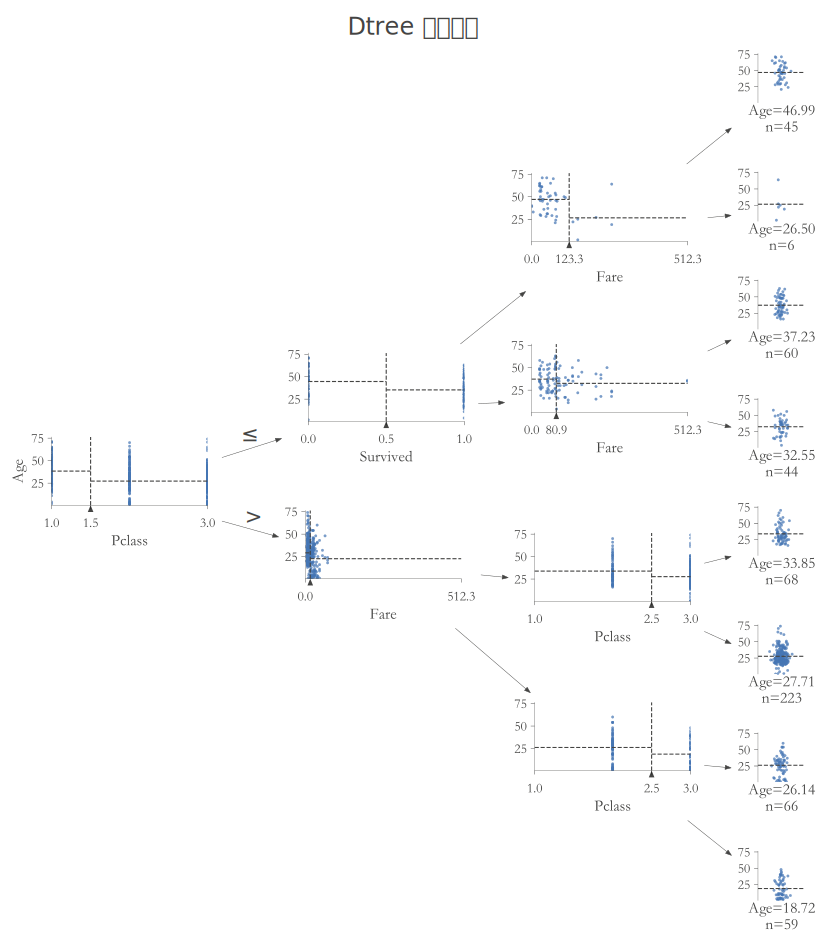

In [192]:
from dtreeviz import model

viz_model = model(
    model=tree_reg,
    X_train=X_train,
    y_train=y_train,
    feature_names=X_train.columns.tolist(),
    target_name="Age"
                 )
viz = viz_model.view(fontname='STsong', # 设定显示中文字体
               scale=1.5,  # 设定缩放系数
               orientation='LR', # 可以设定显示的方向,默认是'TD'可以修改为'LR'
               label_fontsize=14, # 标签的字体大小
               ticks_fontsize=12, # 刻度字体大小
               title='Dtree 标题测试', # 设定标题
               title_fontsize=16,  # 设定的标题党字体大小.
               show_root_edge_labels=True, # 在根节点发出的边上,显示大于小于符号
               leaftype='pie', # 叶子节点的图表类型,默认是pie,可以设置为barh
               histtype='bar', # 对于分类器的指示类型,可以设定为bar或者barstacked
               fancy=True, # 是否显示为复杂样式
              )
viz

In [164]:
viz.save('dtreeviz.svg')

In [132]:
x = X_test.iloc[10]

D:\Anaconda3\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Anaconda3\Lib\site-packages\dtreeviz\trees.py:1324: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


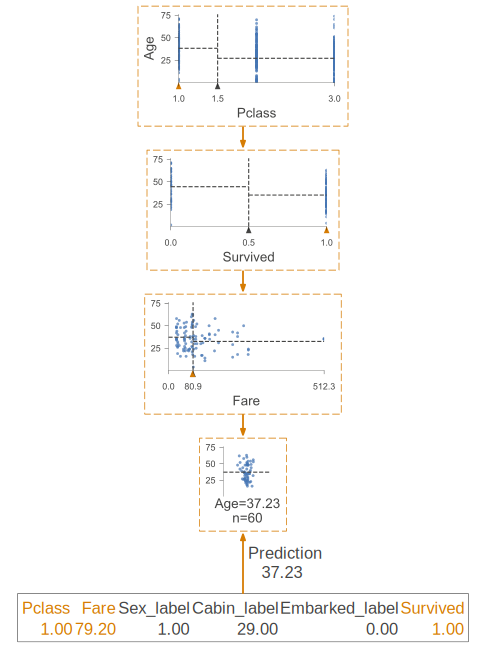

In [136]:
viz_model.view(x=x,scale=1.5,
              show_just_path=True,
              )

D:\Anaconda3\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


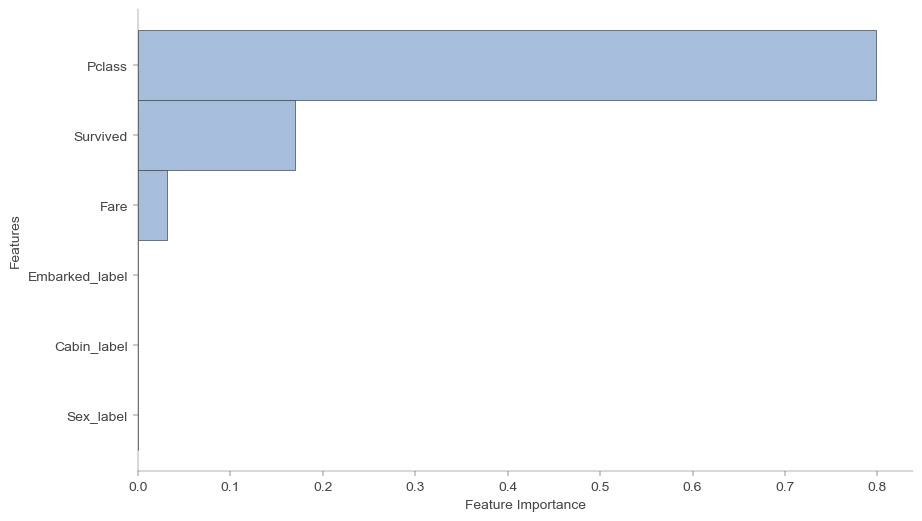

In [140]:
# 查看比较重要的特征
viz_model.instance_feature_importance(x=x, figsize=(10,6))
plt.show()

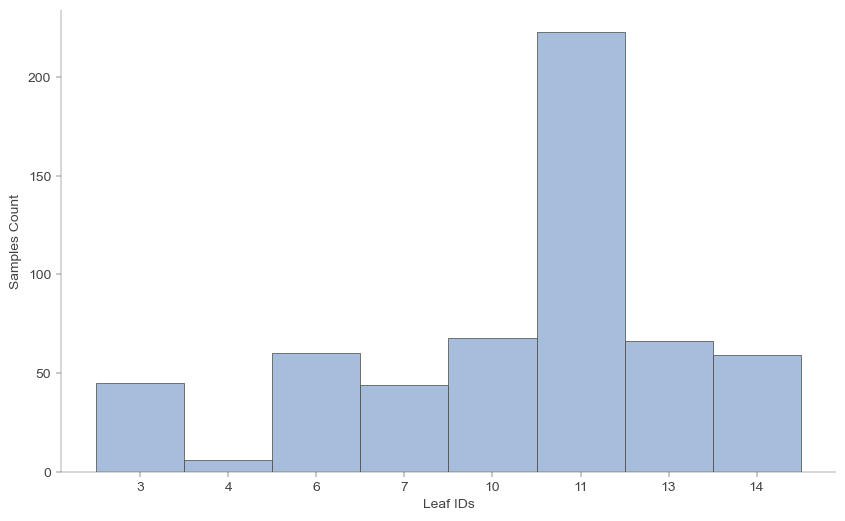

In [142]:
# 查看每个叶子节点的大小
viz_model.leaf_sizes(figsize=(10,6))

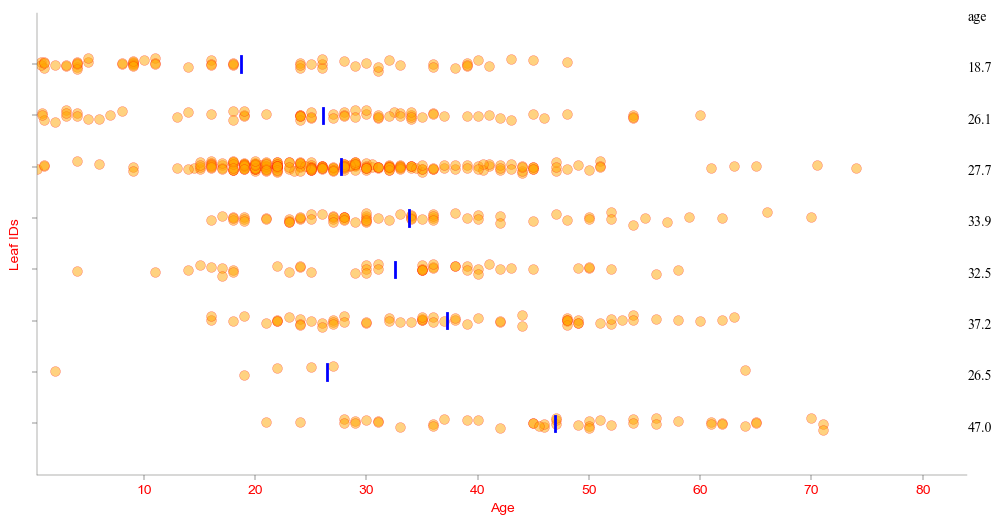

In [157]:
# 显示决策树中每个叶子中目标变量值的分布情况
colors={'scatter_edge':'red',
       'scatter_marker': 'orange',
        'scatter_marker_alpha': .7,
        'split_line': 'blue', # 设定分割线的
        'tick_label':'red',
        'axis_label': 'red',
       }
viz_model.rtree_leaf_distributions(figsize=(12,6),colors=colors)

In [159]:
# 可以查看决策树中,指定节点的统计信息
viz_model.node_stats(node_id=4)

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,6.0,6.0,6.0,6.0,6.0,6.0
mean,1.0,196.038883,0.666667,54.666667,1.333333,0.0
std,0.0,57.989627,0.516398,28.061836,1.032796,0.0
min,1.0,135.6333,0.0,-1.0,0.0,0.0
25%,1.0,151.55,0.25,62.0,0.5,0.0
50%,1.0,181.525,1.0,62.5,2.0,0.0
75%,1.0,250.125,1.0,63.0,2.0,0.0
max,1.0,263.0,1.0,79.0,2.0,0.0


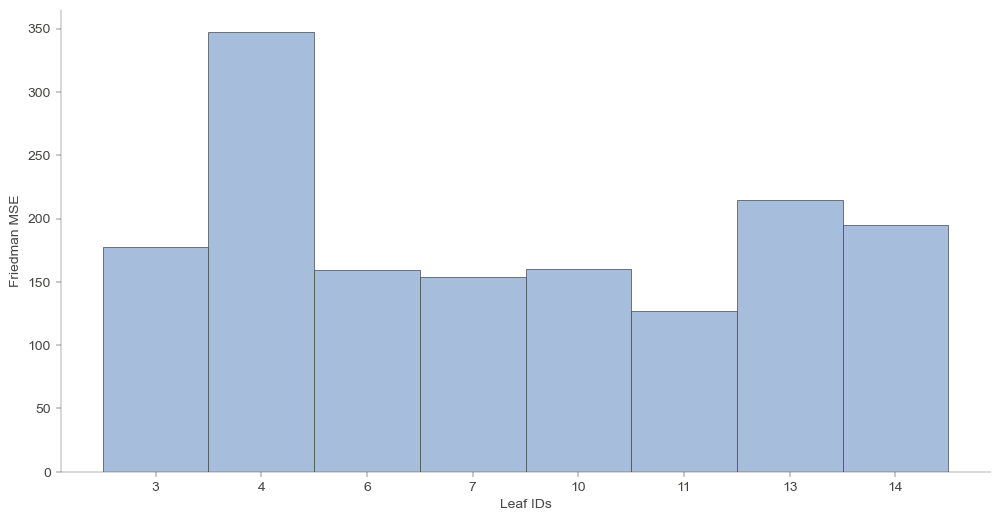

In [161]:
# 查看每个叶子节点的从混都指标
viz_model.leaf_purity(figsize=(12,6))

## 回归树单变量可视化和双变量特征空间的划分

mse计算分为: 19.776963440506847
计算得到R^2为: 0.6548185760165443


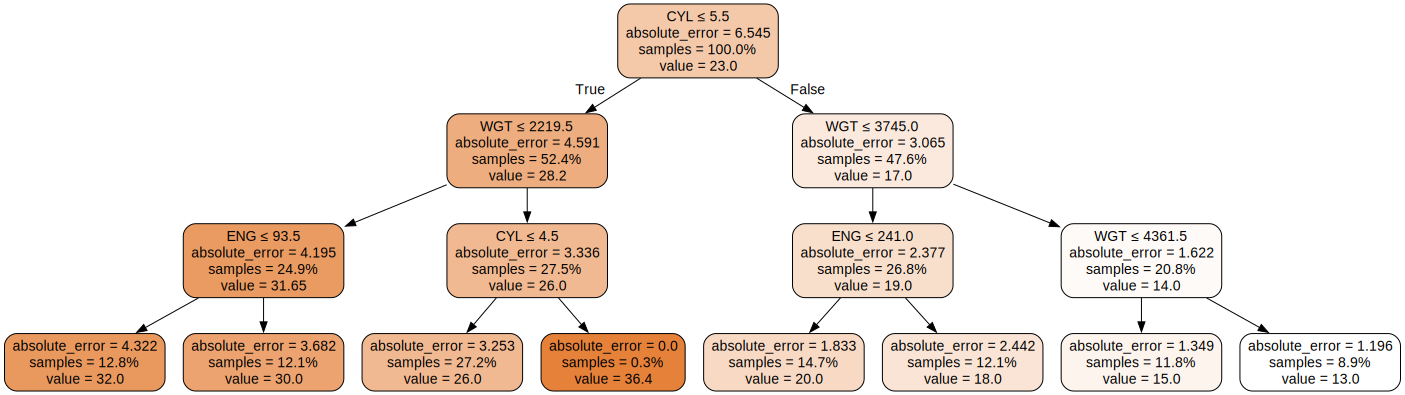

In [203]:
data = pd.read_csv('./data/cars.csv')
X, y = data.iloc[:,1:], data.iloc[:,0]
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1210)

# 实例化回归树,树的最大深度为3, 采用绝对值误差,
dtr_cars = DecisionTreeRegressor(max_depth=3, criterion='absolute_error')
dtr_cars.fit(X_train,y_train)

# 评分采用cross_val_score 这里用10折交叉验证, 分数采用mse
from sklearn.model_selection import cross_val_score
cv10 = cross_val_score(dtr_cars, X_train, y_train,cv=10, scoring='neg_mean_squared_error')
cv10.mean()
# 同样将MSE和R^2也打印出来,这里建议使用metrics中mse和R^2
y_pred = dtr_cars.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"mse计算分为: {mse}")
print(f'计算得到R^2为: {r2}')

# 绘制决策树, 可以采用dtreeviz模块,或者tree模块
from sklearn import tree
import graphviz
dot = tree.export_graphviz(
    dtr_cars,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    proportion=True, # 显示为类别的占比信息
    special_characters=True, 
                          )
graph = graphviz.Source(dot)
graph.render('reg_tree', format='pdf')
graph

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


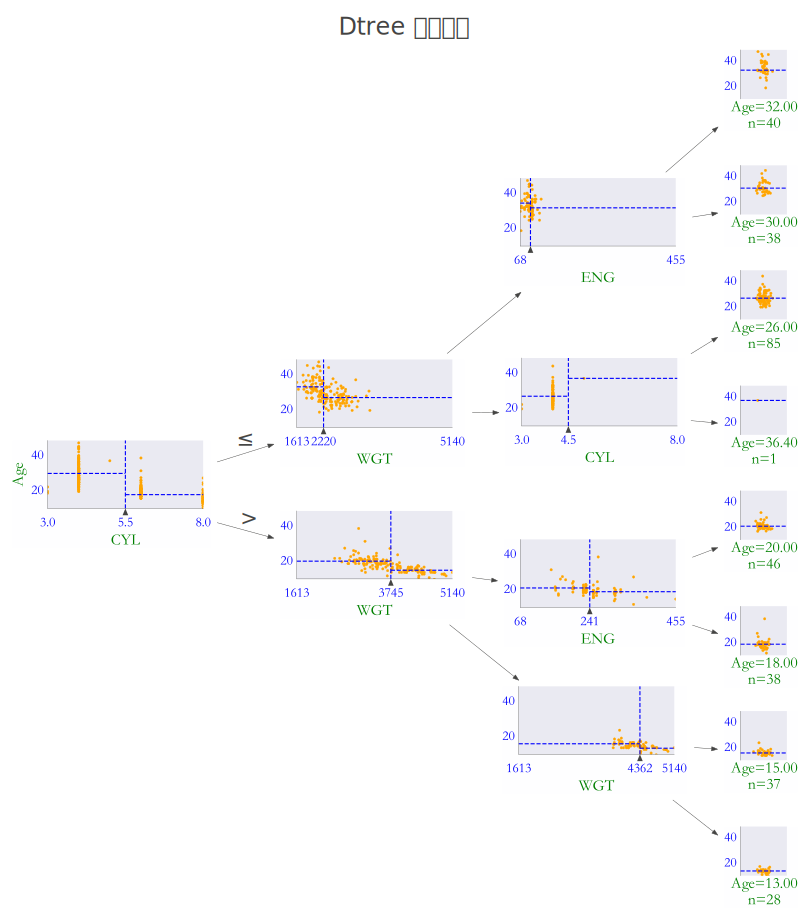

In [227]:
import dtreeviz
import matplotx
plt.style.use(matplotx.styles.pitaya_smoothie['light'])
plt.rcParams['font.size'] = 16
plt.rcParams['font.sans-serif'] = 'Times New Roman'
viz_model = dtreeviz.model(
    dtr_cars,
    X_train=X_train,
    y_train=y_train,
    feature_names=X_train.columns.tolist(),
     target_name="Age"
    
)
color = {
    "scatter_edge":'red',
    'scatter_marker':'orange',
    'arrow':'blue',
    "split_line":'blue',
    "axis_label":'green',
    "tick_label":'blue',
    "leaf_label":'red',
    'scatter_marker_alpha':1,
}
viz = viz_model.view(fontname='STsong', # 设定显示中文字体
               scale=1.5,  # 设定缩放系数
               orientation='LR', # 可以设定显示的方向,默认是'TD'可以修改为'LR'
               label_fontsize=14, # 标签的字体大小
               ticks_fontsize=12, # 刻度字体大小
               title='Dtree 标题测试', # 设定标题
              
               title_fontsize=16,  # 设定的标题党字体大小.
               show_root_edge_labels=True, # 在根节点发出的边上,显示大于小于符号
               leaftype='pie', # 叶子节点的图表类型,默认是pie,可以设置为barh
               histtype='bar', # 对于分类器的指示类型,可以设定为bar或者barstacked
               fancy=True, # 是否显示为复杂样式
              colors=color,
              )
viz

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


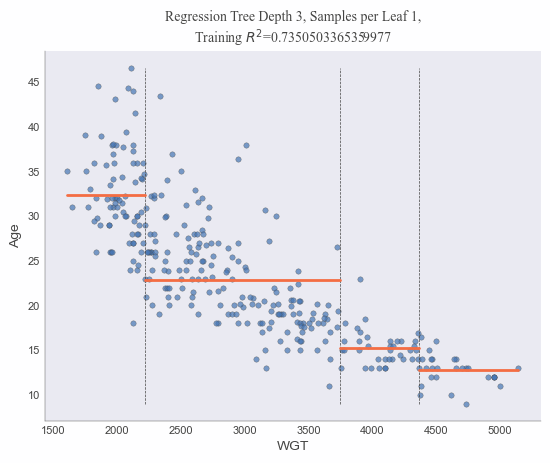

In [228]:
viz_model.rtree_feature_space(features=['WGT'])
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


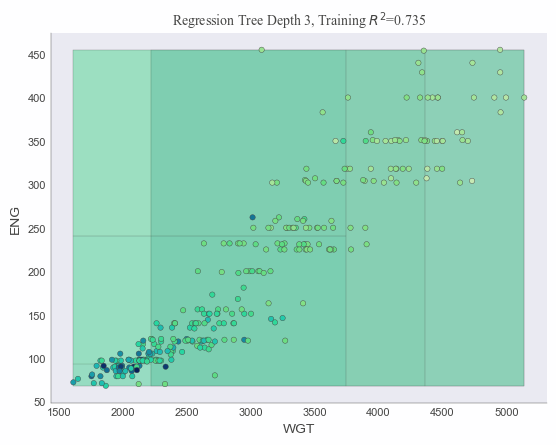

In [233]:
viz_model.rtree_feature_space(features=['WGT','ENG'],
        fontsize=10,show={'splits', 'title'},)
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


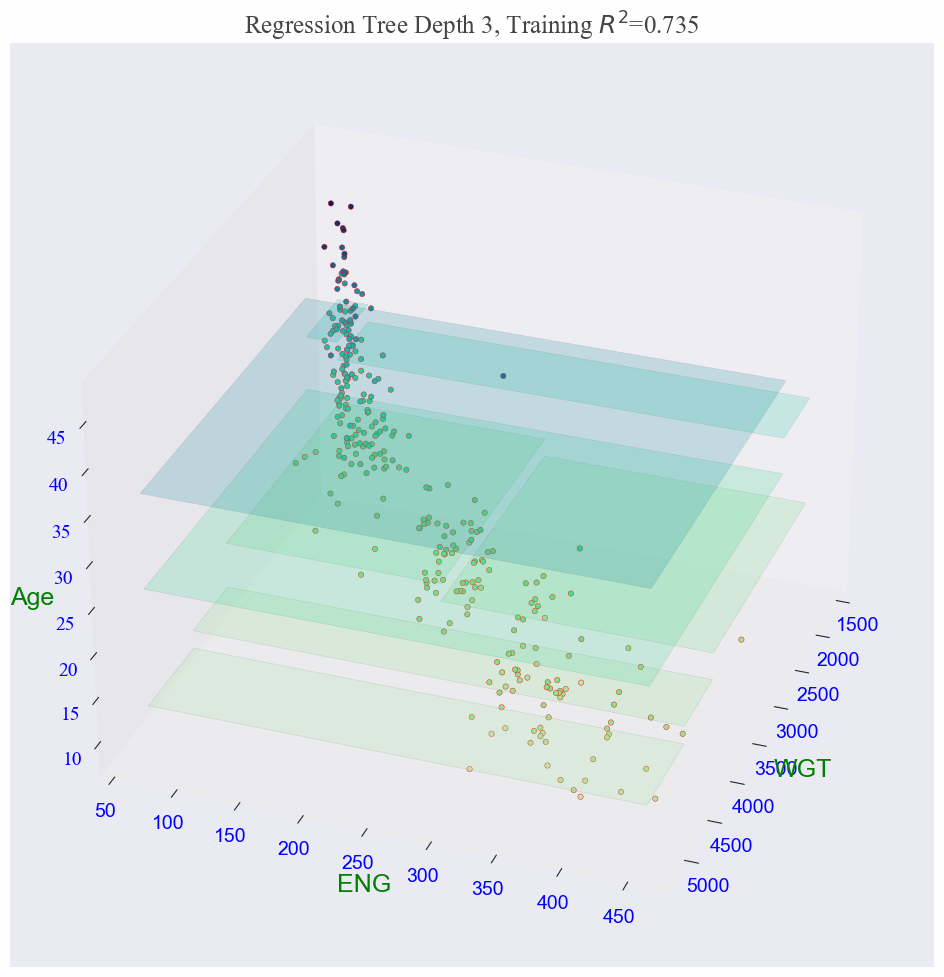

In [257]:
color = {
    "scatter_edge":'red',
    'scatter_marker':'orange',
    'arrow':'blue',
    "split_line":'blue',
    "axis_label":'green',
    "tick_label":'blue',
    "leaf_label":'red',
    'scatter_marker_alpha':1,
    "tessellation_alpha_3D":0.2,
}

viz_model.rtree_feature_space3D(
    features=['WGT','ENG'],
    elev=30,azim=20,
    fontsize=18,
    figsize=(12,12),
    colors=color,
    )
plt.tick_params(labelsize=14)
plt.show()